# Assignment 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

plt.rcParams.update({'font.size': 18})
plt.style.use('seaborn-poster')

%matplotlib inline

## Cubic spline interpolation

$$
f(x) = |\sin(x)|, \quad 0\le x\le 10.
$$

We choose $4001$ uniform grid ponits to construct the interpolating cubic spline.


infinity-norm of error = 7.30e-04



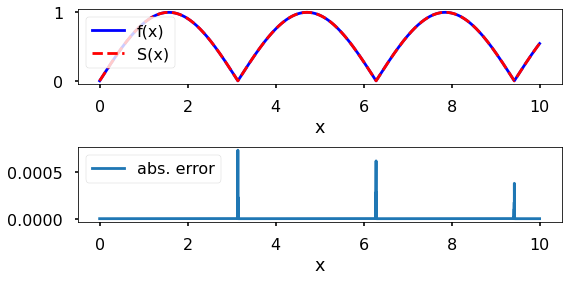

In [2]:
def f(x):
    return np.abs(np.sin(x))

# training points
x_train = np.linspace(0, 10, 4001)
f_train = f(x_train)

# cubic spline construction
S = CubicSpline(x_train, f_train)

# test points
x_test = np.linspace(0, 10, 100000)

# prediction at test points
s_test = S(x_test)

# exact solution at test points
f_test = f(x_test)

# absolute error
abs_error = np.abs(f_test-s_test)

print()
print("infinity-norm of error = %.2e" % np.max(abs_error))
print()

fig = plt.figure(figsize=plt.figaspect(0.5))
plt.subplot(2,1,1)
plt.plot(x_test, f_test, 'b', label= "f(x)")
plt.plot(x_test, s_test, 'r--', label= "S(x)")
plt.xlabel('x')
plt.legend(loc = 2)

plt.subplot(2,1,2)
plt.plot(x_test, abs_error, label= "abs. error")
plt.legend(loc = 2)
plt.xlabel('x')

plt.tight_layout()
plt.show()

---

## Simpson's rule

In [3]:
from scipy import integrate

### Test 1

$$
\int^1_0 x^3\,dx = \frac{1}{4}
$$

In [4]:
def f1(x):
    return x**3

x = np.linspace(0, 1, 3)

value = integrate.simps(f1(x), x)
error = np.abs(value - 0.25)

print("nodes = ", x)
print("integration error, using 3 nodes, is %.2e" % error)

nodes =  [0.  0.5 1. ]
integration error, using 3 nodes, is 0.00e+00


In [5]:
x = np.linspace(0, 1, 1000)
value = integrate.simps(f1(x), x)
error = np.abs(value - 0.25)

print("integration error, using 1000 nodes, is %.2e" % error)

integration error, using 1000 nodes, is 2.51e-10


In [6]:
x = np.linspace(0, 1, 1001)
value = integrate.simps(f1(x), x)
error = np.abs(value - 0.25)

print("integration error, using 1001 nodes, is %.2e" % error)

integration error, using 1001 nodes, is 5.55e-17


In [7]:
x = np.linspace(0, 1, 4)
value = integrate.simps(f1(x), x)
error = np.abs(value - 0.25)

print("nodes = ", x)
print("integration error, using 4 nodes, is %.2e" % error)

nodes =  [0.         0.33333333 0.66666667 1.        ]
integration error, using 4 nodes, is 9.26e-03


#### Quick conclusion 1

Always use **odd** number of points for Simpson's rule. 

**Note:** Very often the code from libraries/packages will not show any *error* nor *warning*, because it was written so good that anyone can use it, even without taking the computational math. course. So `integrate.simps` accepts even number of points, but then the solution is slightly different from what we expect, it will not be **exact** in integrating a cubic polynomial.

---

### Test 2

#### Simpson's rule

If $f(x)$ is a cubic polynomial, Simpson's rule gives
$$
\int^b_{a} f(x) \,dx = \frac{b-a}{6}\left[f(a) + 4f\left(\frac{a+b}{2}\right) + f(b)\right].
$$

#### Example 
So if we are to evaluate $\int^3_0 f(x)\,dx$, where 
$$
f(x) = \left\{
\begin{aligned}
x^2(2x-1), & \quad x\in[0, 1], \\
(x-1)^2(x-3)+1, & \quad x\in[1, 3],
\end{aligned}
\right.
$$
we have
$$
\begin{align}
\int^3_0 f(x)\,dx &= \frac{1-0}{6}\left[f(0) + 4f\left(\frac{0+1}{2}\right) + f(1)\right]+\frac{3-1}{6}\left[f(1) + 4f\left(\frac{1+3}{2}\right) + f(3)\right]\\
&= \frac{1}{6}\left[0 + 0 + 1\right]+\frac{2}{6}\left[1 + 0 + 1\right]\\
&=\frac{5}{6}.
\end{align}
$$

In [8]:
def f2(x):
    if x>=0 and x<1:
        return x*x*(2.0*x-1)
    elif x>=1 and x <= 3:
        return (x-1.0)*(x-1.0)*(x-3.0)+1.0

vf2 = np.vectorize(f2)

In [24]:
x = np.array([0, 0.5, 1.0, 2.0, 3.0])
value = integrate.simps(vf2(x), x)
error = np.abs(value - (5.0/6.0))

print("nodes x = ")
print(np.array2string(x, formatter={'float_kind': '{0:.1f}'.format}))
print()
print("integration error, using 5 nodes, is %.2e" % error)

nodes x = 
[0.0 0.5 1.0 2.0 3.0]

integration error, using 5 nodes, is 1.11e-16


In [25]:
x = np.linspace(0, 3, 7)

value = integrate.simps(vf2(x), x)
error = np.abs(value - (5.0/6.0))

print("nodes x = ")
print(np.array2string(x, formatter={'float_kind': '{0:.1f}'.format}))
print()
print("integration error, using 7 nodes, is %.2e" % error)

nodes x = 
[0.0 0.5 1.0 1.5 2.0 2.5 3.0]

integration error, using 7 nodes, is 1.11e-16


In [26]:
x = np.linspace(0, 3, 1001)

value = integrate.simps(vf2(x), x)
error = np.abs(value - (5.0/6.0))

print("integration error, using 1001 nodes, is %.2e" % error)

integration error, using 1001 nodes, is 9.34e-09


#### A bit more test on this example

In [27]:
x = np.linspace(0, 3, 9)

value = integrate.simps(vf2(x), x)
error = np.abs(value - (5.0/6.0))

print("nodes x = ")
print(np.array2string(x[0:10], formatter={'float_kind': '{0:.3f}'.format}))
print()
print("integration error is %.2e" % error)

nodes x = 
[0.000 0.375 0.750 1.125 1.500 1.875 2.250 2.625 3.000]

integration error is 1.73e-02


In [13]:
x = np.linspace(0, 3, 11)

value = integrate.simps(vf2(x), x)
error = np.abs(value - (5.0/6.0))

print("x[0:11]= ")
print(np.array2string(x[0:11], formatter={'float_kind': '{0:.3f}'.format}))
print()
print("integration error is %.2e" % error)

x[0:11]= 
[0.000 0.300 0.600 0.900 1.200 1.500 1.800 2.100 2.400 2.700 3.000]

integration error is 9.73e-03


In [14]:
x = np.linspace(0, 3, 13)

value = integrate.simps(vf2(x), x)
error = np.abs(value - (5.0/6.0))

print("x[0:11]= ")
print(np.array2string(x[0:11], formatter={'float_kind': '{0:.3f}'.format}))
print()
print("integration error is %.2e" % error)

x[0:11]= 
[0.000 0.250 0.500 0.750 1.000 1.250 1.500 1.750 2.000 2.250 2.500]

integration error is 2.22e-16


In [15]:
x = np.linspace(0, 3, 1001)

value = integrate.simps(vf2(x), x)
error = np.abs(value - (5.0/6.0))

print("x[30:41]= ")
print(np.array2string(x[30:41], formatter={'float_kind': '{0:.3f}'.format}))
print()
print("integration error is %.9e" % error)

x[30:41]= 
[0.090 0.093 0.096 0.099 0.102 0.105 0.108 0.111 0.114 0.117 0.120]

integration error is 9.337333462e-09


In [31]:
x = np.linspace(0, 3, 901)

value = integrate.simps(vf2(x), x)
error = np.abs(value - (5.0/6.0))

print("x[26:35]= ")
print(np.array2string(x[26:35], formatter={'float_kind': '{0:.3f}'.format}))
print()
print("integration error, using 901 nodes, is %.2e" % error)

x[26:35]= 
[0.087 0.090 0.093 0.097 0.100 0.103 0.107 0.110 0.113]

integration error, using 901 nodes, is 1.11e-16


#### Quick conclusion 2

For Simpson's rule, we should make sure that the integrand is a cubic polynomial in each subinterval.

---

### Test 3

Let us try to use another one called `integrate.quad`. 

#### Example 1

$$
\int^1_0 x^3\,dx = \frac{1}{4}
$$

In [37]:
value, err = integrate.quad(f1, 0, 1)
error = np.abs(value - 0.25)

print("err predicted by quad = %.2e" % err)
print()
print("true integration error is %.2e" % error)

err predicted by quad = 2.78e-15

true integration error is 0.00e+00


#### Example 2

$\int^3_0 f(x)\,dx = \frac{5}{6}$, where 
$$
f(x) = \left\{
\begin{aligned}
x^2(2x-1), & \quad x\in[0, 1], \\
(x-1)^2(x-3)+1, & \quad x\in[1, 3].
\end{aligned}
\right.
$$

In [38]:
value, err = integrate.quad(vf2, 0, 3)
error = np.abs(value - (5.0/6.0))

print("err predicted by quad = %.2e" % err)
print()
print("true integration error is %.2e" % error)

err predicted by quad = 2.08e-10

true integration error is 1.11e-16


#### Example 3

$$
\int^{10}_0 |\sin(x)|\,dx = 7 + \cos(10).
$$

In [39]:
# Calculate the integral using integrate.quad

value, err = integrate.quad(f, 0, 10)
error = np.abs(value - (7.0+np.cos(10.0)))

print("value = ", value)
print("err predicted by quad = %.2e" % err)
print()
print("true integration error is %.2e" % error)

value =  6.160928474114832
err predicted by quad = 6.46e-08

true integration error is 3.19e-09


#### Example 4

The cubic spline we have found is $S(x)$, so we can evaluate 
$$
\int^{10}_0 S(x)\,dx
$$
using Simpson's rule, with properly chosen nodes.

In [48]:
value_S, err = integrate.quad(S, 0, 10)

print("The prediction = ", value_S)
print()
print("err predicted by quad = %.2e" % err)

The prediction =  6.160928540170244

err predicted by quad = 6.27e-08


---

In [49]:
x_nodes = np.linspace(0, 10, 8001)
value_e = integrate.simps(S(x_nodes), x_nodes)
print("The true value =", value_e)

The true value = 6.160928540430731


In [50]:
error = np.abs(value_e - value_S)

print("true integration error of quad is %.2e" % error)

true integration error of quad is 2.60e-10


#### Summary

If we construct the cubic spline $S(x)$ using $n$ uniformly-spaced nodes, then the Simplson's rule on $2n-1$ uniformly-spaced nodes will gives us the **exact** integration of $S(x)$.


infinity-norm of error = 8.76e-05



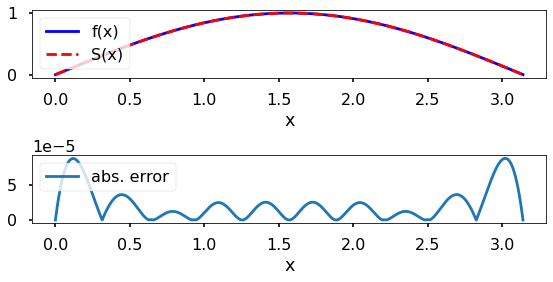

In [7]:
def f(x):
    return np.abs(np.sin(x))

# training points
x_train = np.linspace(0, np.pi-0.001, 11)
f_train = f(x_train)

# cubic spline construction
S = CubicSpline(x_train, f_train)

# test points
x_test = np.linspace(0, np.pi-0.001, 100000)

# prediction at test points
s_test = S(x_test)

# exact solution at test points
f_test = f(x_test)

# absolute error
abs_error = np.abs(f_test-s_test)

print()
print("infinity-norm of error = %.2e" % np.max(abs_error))
print()

fig = plt.figure(figsize=plt.figaspect(0.5))
plt.subplot(2,1,1)
plt.plot(x_test, f_test, 'b', label= "f(x)")
plt.plot(x_test, s_test, 'r--', label= "S(x)")
plt.xlabel('x')
plt.legend(loc = 2)

plt.subplot(2,1,2)
plt.plot(x_test, abs_error, label= "abs. error")
plt.legend(loc = 2)
plt.xlabel('x')

plt.tight_layout()
plt.show()


infinity-norm of error = 3.40e-05



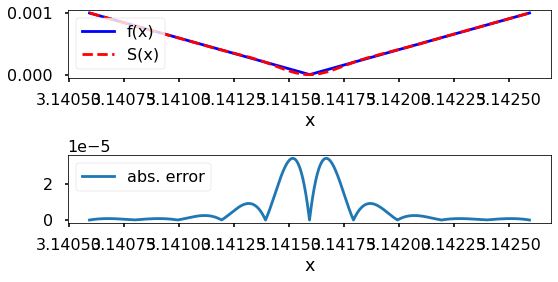

In [8]:
# training points
x_train = np.linspace(np.pi-0.001, np.pi+0.001, 11)
f_train = f(x_train)

# cubic spline construction
S = CubicSpline(x_train, f_train)

# test points
x_test = np.linspace(np.pi-0.001, np.pi+0.001, 100000)

# prediction at test points
s_test = S(x_test)

# exact solution at test points
f_test = f(x_test)

# absolute error
abs_error = np.abs(f_test-s_test)

print()
print("infinity-norm of error = %.2e" % np.max(abs_error))
print()

fig = plt.figure(figsize=plt.figaspect(0.5))
plt.subplot(2,1,1)
plt.plot(x_test, f_test, 'b', label= "f(x)")
plt.plot(x_test, s_test, 'r--', label= "S(x)")
plt.xlabel('x')
plt.legend(loc = 2)

plt.subplot(2,1,2)
plt.plot(x_test, abs_error, label= "abs. error")
plt.legend(loc = 2)
plt.xlabel('x')

plt.tight_layout()
plt.show()